In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#load train data
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check for null values in each column
null_values = df.isnull().sum()
print(null_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

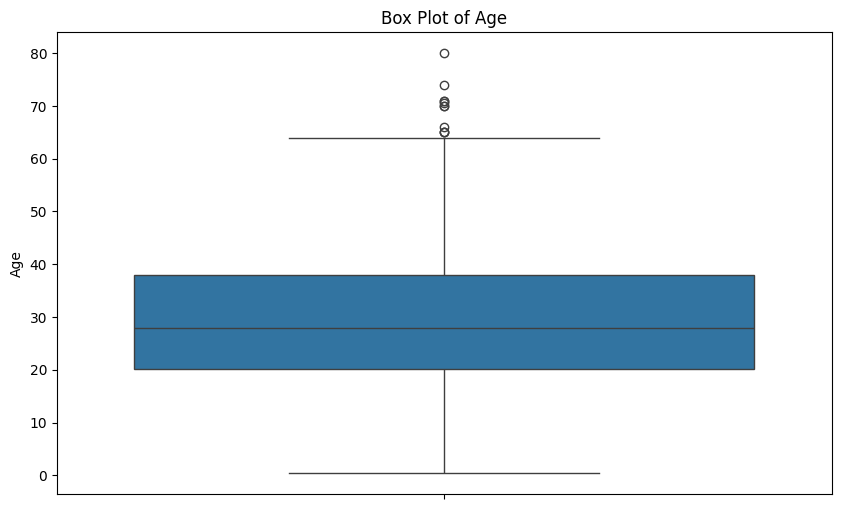

In [ ]:

# Create a boxplot for the 'Age' feature
plt.figure(figsize=(10, 6))
sns.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.show()



In [ ]:

# Calculate the median of the 'Age' and 'Fare' columns
age_median = df['Age'].median()

# Fill missing values with the median
df['Age'].fillna(age_median, inplace=True)

# Optionally, check again to ensure no more null values exist in these columns
print(df['Age'].isnull().sum())


0


In [ ]:

# Calculate the mode of the 'Embarked' column
embarked_mode = df['Embarked'].mode()[0]  # mode() returns a Series, take the first mode if there are multiple modes
cabin_mode = df['Cabin'].mode()[0]  # mode() returns a Series, take the first mode if there are multiple modes

# Fill missing values with the mode
df['Embarked'].fillna(embarked_mode, inplace=True)
df['Cabin'].fillna(cabin_mode, inplace=True)

# Optionally, check again to ensure no more null values exist in this column
print(df['Embarked'].isnull().sum())
print(df['Cabin'].isnull().sum())




0
0


In [ ]:
# Check for null values in each column
null_values = df.isnull().sum()
print(null_values)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


In [ ]:
# df['Sex'].unique()
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# Generate dummy variables for the 'Sex' column
sex_dummies = pd.get_dummies(df['Sex'], prefix='')
sex_dummies1 = pd.get_dummies(df['Embarked'], prefix='')

# Concatenate the dummy variables to the original DataFrame
df = pd.concat([df, sex_dummies], axis=1)
df = pd.concat([df, sex_dummies1], axis=1)

# Rename columns directly to match the requirement
df.rename(columns={'male': 'Male', 'female': 'Female'}, inplace=True)
df.rename(columns={'S': 'S', 'C': 'C','Q':'Q'}, inplace=True)

# Check the result
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,_female,_male,_C,_Q,_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,False,True,False,False,True


In [ ]:

# Convert Boolean column to integers using map
df['_female'] = df['_female'].map({True: 1, False: 0})
df['_male'] = df['_male'].map({True: 1, False: 0})
df['_C'] = df['_C'].map({True: 1, False: 0})
df['_Q'] = df['_Q'].map({True: 1, False: 0})
df['_S'] = df['_S'].map({True: 1, False: 0})

df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,_female,_male,_C,_Q,_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0


In [ ]:
df.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,_female,_male,_C,_Q,_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
_female          int64
_male            int64
_C               int64
_Q               int64
_S               int64
dtype: object

In [ ]:

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.770949720670391
Confusion Matrix:
 [[86 19]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [ ]:

rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
rf_pre=rf.predict(X_test)
print(classification_report(y_test,rf_pre))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

